In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

ingeo_colours = ["#0077BB","#33BBEE","#009988","#EE7733","#CC3311","#EE3377","#BBBBBB","#5D54A4"]


In [2]:
df = pd.read_csv("ParameterData_Main.txt", sep="\t")


In [3]:
gates = pd.read_csv("GatedPopulations.txt", sep="\t")

In [4]:
cells = df.loc[df['Cells']==1]

In [5]:
cells = cells.groupby(['Well ']).sum()

In [6]:
gates = gates.loc[gates['Group']>1]

In [7]:
conditions = list(gates['Name / Description'])

In [8]:
cells['conditions'] = conditions

In [20]:
cells[['Treatment', 'Repeat']] = cells['conditions'].str.split('_', expand=True)

In [21]:
cells

,Object ID,Circularity Factor YFP_BC,Mean Intensity YFP_BC,Total Intensity mCherry2,Mean Intensity mCherry2,Total Intensity DAPI,Mean Intensity DAPI,Total Intensity Alexa 647,Mean Intensity Alexa 647,Total Intensity YFP,...,Center Y,Parent Object ID (Well),Parent Trace ID,Cells,SOX17+,SOX17+Ach+,SOX17+Ach-,conditions,Treatment,Repeat
Well,,,,,,,,,,,,,,,,,,,,,
50,2417153820,73065.573519,2.023688e+06,3.239733e+10,4.069842e+07,7.384216e+11,9.396247e+08,1.310893e+11,1.605907e+08,1.285864e+10,...,69925961.0,3359979,-68571,68571,0,0,0,Untreated_R1,Untreated,R1
51,7821580603,78923.739859,4.007539e+06,6.300673e+10,8.261825e+07,8.644028e+11,1.179394e+09,4.000441e+11,5.092798e+08,1.486020e+10,...,74060920.5,3623250,-72465,72465,23930,7765,16165,A100_R1,A100,R1
52,11264316640,68321.017906,6.080842e+06,7.419216e+10,9.439801e+07,7.950135e+11,1.054159e+09,3.903996e+11,5.044638e+08,1.669610e+10,...,64816541.5,3214428,-63028,63028,28589,17467,11122,A100B10_R1,A100B10,R1
53,15188619124,66787.729876,1.917568e+06,3.467171e+10,4.614578e+07,7.603972e+11,1.024851e+09,1.451135e+11,1.889125e+08,1.135653e+10,...,64167316.0,3230032,-62116,62116,58,0,58,LDNS_R1,LDNS,R1
54,19064661910,67203.074547,2.640534e+06,4.468777e+10,5.105991e+07,6.970671e+11,8.261576e+08,4.625788e+11,5.097332e+08,1.425769e+10,...,62614122.0,3265171,-61607,61607,26991,5313,21678,LDN24_R1,LDN24,R1
55,22660987619,66171.640080,4.326364e+06,5.103997e+10,6.030968e+07,6.246661e+11,7.674469e+08,4.567961e+11,5.331004e+08,1.517671e+10,...,61491128.0,3272724,-60606,60606,35280,16404,18876,LDN48_R1,LDN48,R1
62,41865060807,58828.624162,1.632287e+06,2.560909e+10,2.919872e+07,5.481131e+11,6.392150e+08,1.081133e+11,1.195768e+08,1.132105e+10,...,56461251.5,3374947,-55327,55327,1,0,1,Untreated_R2,Untreated,R2
63,51914760775,82124.412666,4.294140e+06,5.966968e+10,7.748837e+07,8.837546e+11,1.186485e+09,3.684982e+11,4.687880e+08,1.590746e+10,...,77746965.0,4668414,-75297,75297,25426,10194,15232,A100_R2,A100,R2
64,39097762399,68643.620656,6.087483e+06,6.570377e+10,8.367514e+07,8.055323e+11,1.059324e+09,3.538137e+11,4.552811e+08,1.704660e+10,...,64526191.5,3989979,-63333,63333,29137,18208,10929,A100B10_R2,A100B10,R2


In [22]:
cells['SOX17+'] = (cells['SOX17+']/cells['Cells'])*100

In [43]:
order = ['A100B10','A100','LDNS','LDN24','LDN48']

cells_subset = cells.loc[cells['Treatment'].isin(['A100B10','A100','LDNS','LDN24','LDN48'])]

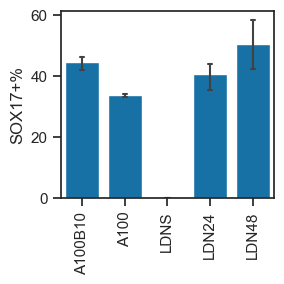

In [46]:
plt.figure(figsize=(3,3), dpi=100)
sns.set_theme(style="ticks")

# Assuming your DataFrame is named df
ax = sns.barplot(data=cells_subset, x='Treatment', y='SOX17+',
                capsize=0.1, errwidth=1.5, dodge=False, palette=[ingeo_colours[0]], order=order)

plt.xlabel(f'')
plt.ylabel(f'SOX17+%')
plt.xticks(rotation=90)

plt.tight_layout()  # Adjust the layout to prevent clipping

# Save the plot as a PDF with high quality settings
plt.savefig("total_sox17.pdf", format='pdf', bbox_inches='tight', pad_inches=0.1)

# Display the plot (optional)
plt.show()

